In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import cmath
import matplotlib.pyplot as plt

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 7);

Populating the interactive namespace from numpy and matplotlib


In [2]:
countByDay = pd.read_csv('data\out_countByDay.csv', header=0, parse_dates=[0]).sort_values(by = 'day')
posByDay = pd.read_csv('data\out_posByDay.csv', header=0, parse_dates=[0]).sort_values(by = 'day')
neutrByDay = pd.read_csv('data\out_neutrByDay.csv', header=0, parse_dates=[0]).sort_values(by = 'day')
negByDay = pd.read_csv('data\out_negByDay.csv', header=0, parse_dates=[0]).sort_values(by = 'day')

In [3]:
#create dimensionless values
ftse = pd.read_csv('data\FTSE.csv', header=0, parse_dates=[0]).sort_values(by = 'Date')
ftse = ftse[['Date', 'Adj Close', 'Volume']]
ftse.columns = ['day', 'price', 'volume']
ftse.head()

,day,price,volume
0,2015-02-11,6818.200195,623275800
1,2015-02-12,6828.100098,809863300
2,2015-02-13,6873.500000,734854200
3,2015-02-16,6857.100098,415979100
4,2015-02-17,6898.100098,612932700


In [4]:
ftse['priceDl'] = ftse['price'].apply(lambda x: x / ftse['price'][0])
ftse['volumeDl'] = ftse['volume'].apply(lambda x: x / ftse['volume'][0])
ftse['complex'] = ftse['priceDl'] + ftse['volumeDl'] * 1j
ftse.head()

,day,price,volume,priceDl,volumeDl,complex
0,2015-02-11,6818.200195,623275800,1.000000,1.000000,(1+1j)
1,2015-02-12,6828.100098,809863300,1.001452,1.299366,(1.001451981859855+1.2993658666035164j)
2,2015-02-13,6873.500000,734854200,1.008111,1.179019,(1.008110616206393+1.1790193041347026j)
3,2015-02-16,6857.100098,415979100,1.005705,0.667408,(1.0057053037293517+0.6674077511111454j)
4,2015-02-17,6898.100098,612932700,1.011719,0.983405,(1.0117186208551918+0.9834052597582001j)


In [5]:
results = pd.merge(posByDay, neutrByDay, on='day')
results = pd.merge(results, negByDay, on='day')
results.columns = ['day', 'positive', 'neutral', 'negative']
results.head()

,day,positive,neutral,negative
0,2016-02-24,738,4624,2511
1,2016-02-25,1138,6670,3583
2,2016-02-26,952,5775,3287
3,2016-02-27,804,4578,2360
4,2016-02-28,1057,5172,2616


In [6]:
results["diff"] = (results["positive"] - results["negative"])/(results["positive"] + results["neutral"] + results["negative"])
results.head()

,day,positive,neutral,negative,diff
0,2016-02-24,738,4624,2511,-0.225200
1,2016-02-25,1138,6670,3583,-0.214643
2,2016-02-26,952,5775,3287,-0.233174
3,2016-02-27,804,4578,2360,-0.200982
4,2016-02-28,1057,5172,2616,-0.176258


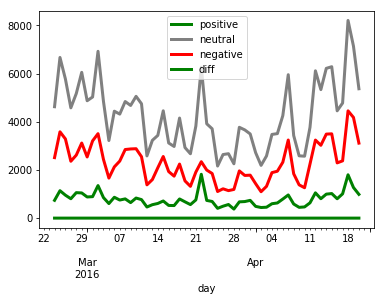

In [7]:
results.plot(x='day', linewidth = 3, color=['g', 'gray', 'r'])

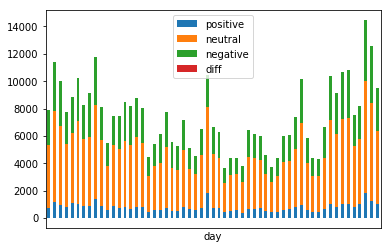

In [8]:
results.plot.bar(x='day', stacked=True);
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()

In [9]:
allRes = pd.merge(results[["day", "diff"]], ftse, on = 'day')
allRes.head()

,day,diff,price,volume,priceDl,volumeDl,complex
0,2016-02-24,-0.225200,5867.200195,834682500,0.860520,1.339186,(0.8605203759347815+1.339186440416907j)
1,2016-02-25,-0.214643,6012.799805,999956900,0.881875,1.604357,(0.881874927845236+1.6043570117755255j)
2,2016-02-26,-0.233174,6096.000000,858937600,0.894078,1.378102,(0.8940775902224736+1.3781019574320068j)
3,2016-02-29,-0.202879,6097.100098,941705500,0.894239,1.510897,(0.8942389374942663+1.5108969416107605j)
4,2016-03-01,-0.200386,6152.899902,933626200,0.902423,1.497934,(0.9024228866896742+1.4979343013157258j)


## Нахождение коэффициента парной корреляции 

In [10]:
def rc(x,y):
    rc_xy = (
        ((y.real + 1j*y.imag)*(x.real + 1j*x.imag)).sum()
        / 
        sqrt(((y.real + 1j*y.imag)**2).sum() * ((x.real + 1j*x.imag)**2).sum())
        )
    return rc_xy;

In [11]:
y = pd.DataFrame({"y":[(1+0*1j),(2+2*1j)],
                  "x":[(0+1*1j),(1+2*1j)]})
rc(y['y'], y['x'])

(-1.0765386909793453+0.05627008447027136j)

In [12]:
allRes.columns = ['date', 'sentimentCoef', 'price', 'volume', 'priceDl', 'volumeDl', 'complex']
allRes = allRes.sort_values(by = 'date')
allRes.head()

,date,sentimentCoef,price,volume,priceDl,volumeDl,complex
0,2016-02-24,-0.225200,5867.200195,834682500,0.860520,1.339186,(0.8605203759347815+1.339186440416907j)
1,2016-02-25,-0.214643,6012.799805,999956900,0.881875,1.604357,(0.881874927845236+1.6043570117755255j)
2,2016-02-26,-0.233174,6096.000000,858937600,0.894078,1.378102,(0.8940775902224736+1.3781019574320068j)
3,2016-02-29,-0.202879,6097.100098,941705500,0.894239,1.510897,(0.8942389374942663+1.5108969416107605j)
4,2016-03-01,-0.200386,6152.899902,933626200,0.902423,1.497934,(0.9024228866896742+1.4979343013157258j)


In [13]:
print('rc volume-volume:      ' + str(rc(allRes['volumeDl'],
                                    allRes['volumeDl'])))

print('rc volume-price:       ' + str(rc(allRes['volumeDl'],
                                    allRes['priceDl'])))

print('rc price-volume*1000:  ' + str(rc(allRes['priceDl'],
                                    allRes['volumeDl']*1000)))

rc volume-volume:      (0.9999999999999999+0j)
rc volume-price:       (0.9836986116872817+0j)
rc price-volume*1000:  (0.9836986116872819+0j)


In [14]:
#Стандартная функция для нахождения корреляции
np.corrcoef(allRes['volume'], allRes['price'])[0][1]

-0.16719534079322415

In [15]:
startShift = -10
endShift = 10
rcdf = pd.DataFrame(columns=('shift', 'rc'))

for i in range(startShift, endShift+1):
    if (i < 0):
        row = pd.DataFrame({"shift":[i], 
                            "rc": [rc(allRes['sentimentCoef'].iloc[:-i],
                                  allRes['priceDl'].shift(i).iloc[:-i])]})
    elif (i == 0):
        row = pd.DataFrame({"shift":[i], 
                            "rc": [rc(allRes['sentimentCoef'],
                                  allRes['priceDl'])]})
    else:    
        row = pd.DataFrame({"shift":[i], 
                        "rc": [rc(allRes['sentimentCoef'].iloc[i:],
                                  allRes['priceDl'].shift(i).iloc[i:])]})

    rcdf = rcdf.append(row, ignore_index=True)
    
rcdf

,shift,rc
0,-10,(-0.9952603150571695+0j)
1,-9,(-0.9950888878480905+0j)
2,-8,(-0.9951597090487229+0j)
3,-7,(-0.9950039565903769+0j)
4,-6,(-0.9961630098564849+0j)
5,-5,(-0.9984038006967088+0j)
6,-4,(-0.9984503832063677+0j)
7,-3,(-0.999395860812226+0j)
8,-2,(-0.9997099186240782+0j)
9,-1,(-1+0j)


## Нормирование результатов

In [16]:
allRes["sentimentCoefNorm"] = (allRes["sentimentCoef"] - allRes["sentimentCoef"].min()) / (allRes["sentimentCoef"].max() - allRes["sentimentCoef"].min())
allRes["priceNorm"] = (allRes["price"] - allRes["price"].min()) / (allRes["price"].max() - allRes["price"].min())
allRes["volumeNorm"] = (allRes["volume"] - allRes["volume"].min()) / (allRes["volume"].max() - allRes["volume"].min())

In [17]:
#Стандартная функция для нахождения корреляции
np.corrcoef(allRes['volumeNorm'], allRes['priceNorm'])[0][1]

-0.1671953407932242

In [18]:
print('rc volumeNorm-priceNorm: ' + str(rc(allRes['volumeNorm'],
                                           allRes['priceNorm'])))

rc volumeNorm-priceNorm: (0.8042252254874648+0j)


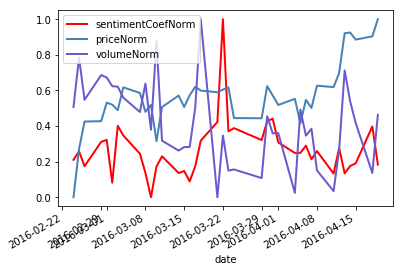

In [19]:
allRes[['date', 'sentimentCoefNorm', 'priceNorm', 'volumeNorm']].plot(x='date', linewidth = 2, color = ['r', 'steelblue', 'slateblue'])